In [5]:
# Libraries which we used for data preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Libraries we used for Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Libraries for measuring the accuracy of the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
%matplotlib inline

In [6]:
#Importing the dataset which was stored in the s3 bucket
df = pd.read_csv('s3://mygroup12/heart_disease.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
HeartDisease        319795 non-null object
BMI                 319795 non-null float64
Smoking             319795 non-null object
AlcoholDrinking     319795 non-null object
Stroke              319795 non-null object
PhysicalHealth      319795 non-null int64
MentalHealth        319795 non-null int64
DiffWalking         319795 non-null object
Sex                 319795 non-null object
AgeCategory         319795 non-null object
Race                319795 non-null object
Diabetic            319795 non-null object
PhysicalActivity    319795 non-null object
GenHealth           319795 non-null object
SleepTime           319795 non-null int64
Asthma              319795 non-null object
KidneyDisease       319795 non-null object
SkinCancer          319795 non-null object
dtypes: float64(1), int64(3), object(14)
memory usage: 43.9+ MB


In [8]:
#checking whether any column has null values
df.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

In [9]:
#to check what are the categorical variables
df_categorical=df.select_dtypes(include=["object"])
df_categorical.head(5)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [10]:
#to check what variables have numerical values
df_numerical=df.select_dtypes(include=["float64","int64"])
df_numerical.head(5)

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3,30,5
1,20.34,0,0,7
2,26.58,20,30,8
3,24.21,0,0,6
4,23.71,28,0,8


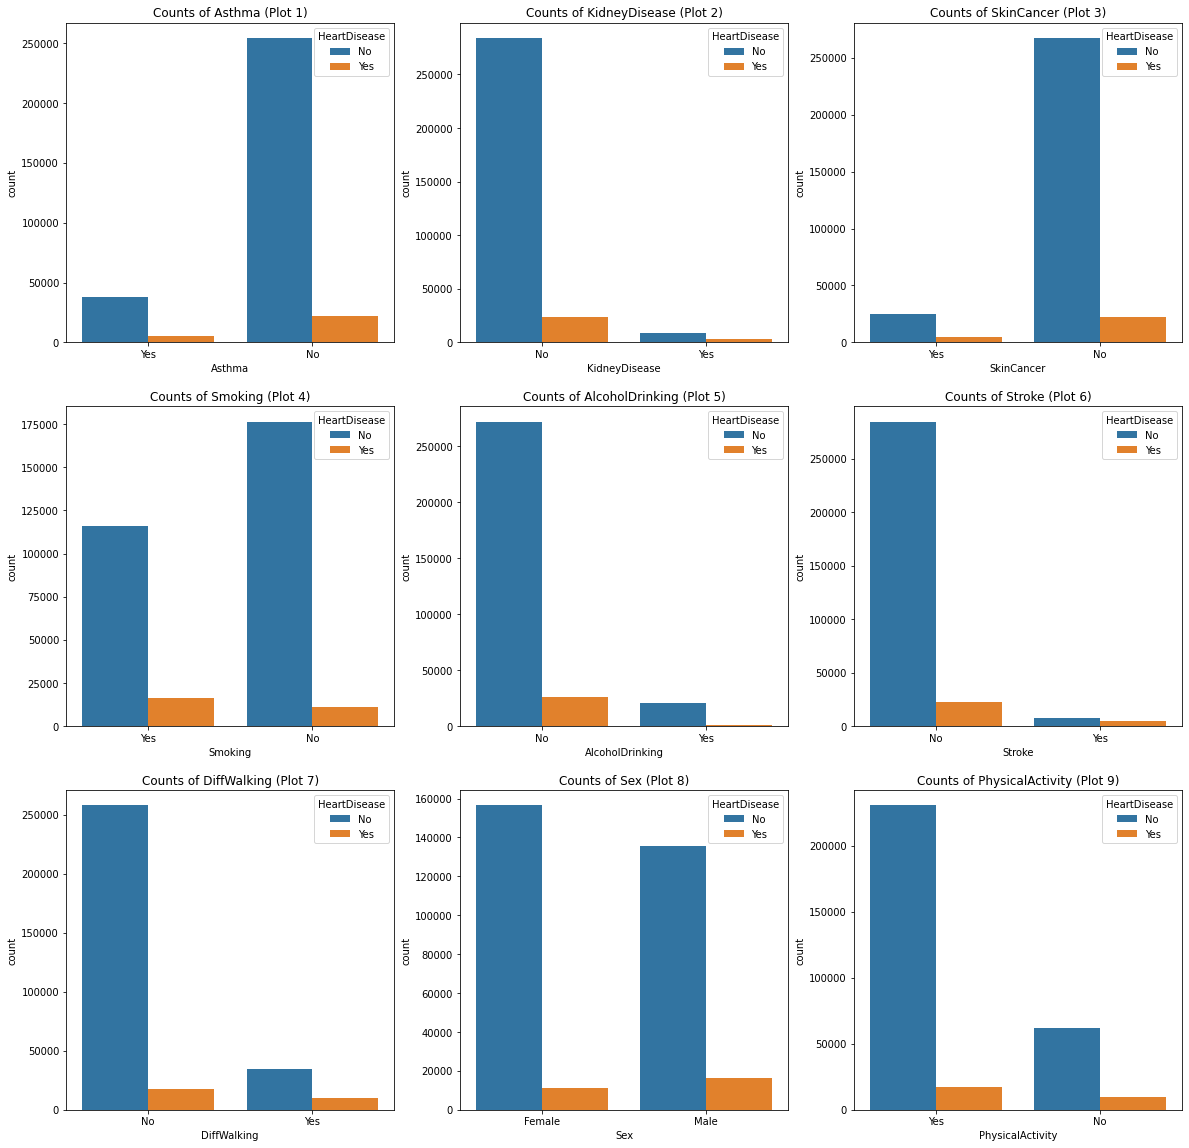

In [11]:
# This list of lists contains all the columns which have binary categorical values
colRange = [['Asthma','KidneyDisease','SkinCancer'],['Smoking','AlcoholDrinking','Stroke'],['DiffWalking','Sex','PhysicalActivity']]
# This function prints the countplots counting the number of people in each category
def printCount(cols):
    fig, axes = plt.subplots(3, 3, figsize=(20, 20))
    i=0
    j=0
    count=1
    for i in range(3):
        for j in range(3):
            # reads column name from the list
            column = colRange[i][j]
            # plots the counts of the particular column
            sns.countplot(ax=axes[i,j],x=df[column],hue=df['HeartDisease'])
            # sets the title of the corresponding plot along with plot number
            axes[i,j].set_title("Counts of {} (Plot {})".format(column,count))
            count += 1
# Calling the function
printCount(colRange)

Text(0.5, 1.0, 'Distribution of BMI Among People')

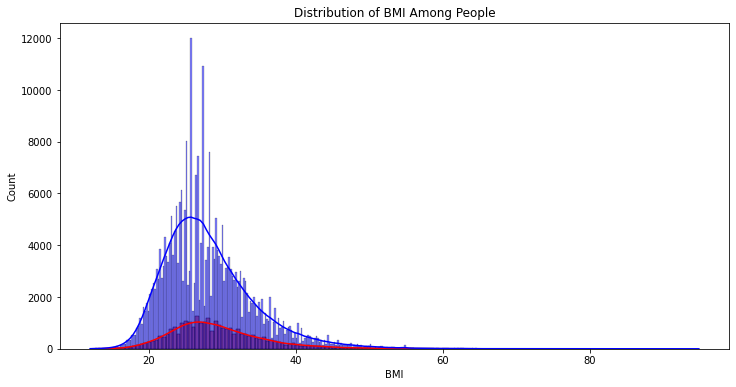

In [12]:
plt.figure(figsize=(12,6))
# histplot plots the distribution of values in the particular column
sns.histplot(data=df[df['HeartDisease']=='Yes'],x='BMI',kde=True,color='red')
sns.histplot(data=df[df['HeartDisease']=='No'],x='BMI',kde=True,color='blue')
plt.title('Distribution of BMI Among People')

/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variation of Heart Disease among Diabetic People')

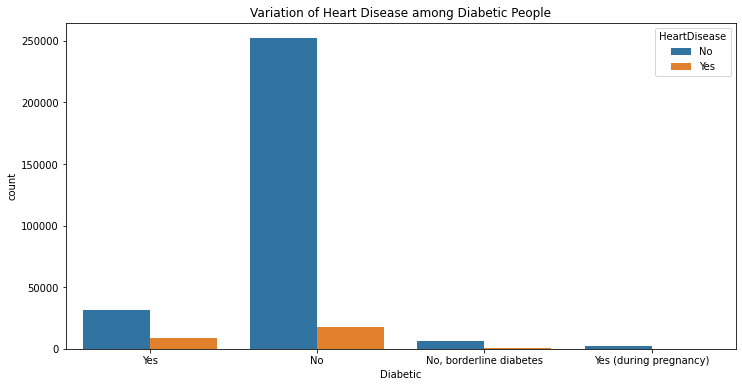

In [13]:
plt.figure(figsize=(12,6))
# plotting the graph
sns.countplot(df['Diabetic'],hue=df['HeartDisease'])
plt.title('Variation of Heart Disease among Diabetic People')

/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variation of Heart Disease amoung Races')

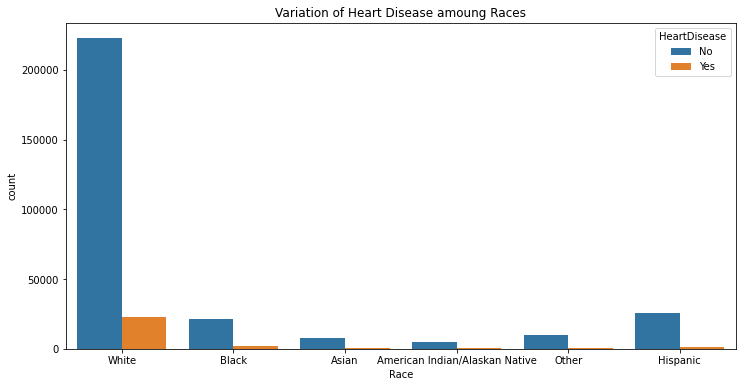

In [14]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
sns.countplot(df['Race'],hue=df['HeartDisease'])
plt.title('Variation of Heart Disease amoung Races')

Text(0.5, 1.0, 'Physical Health Pattern')

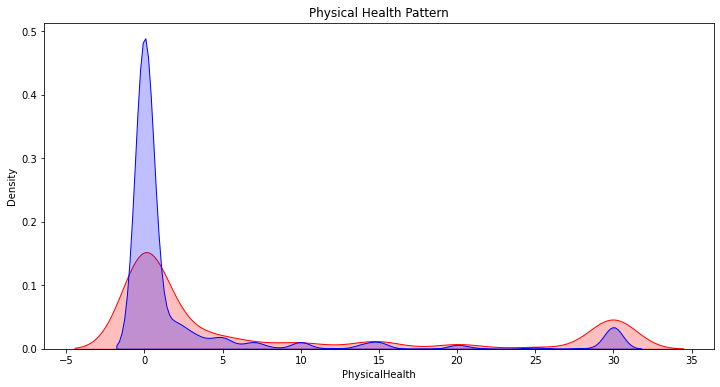

In [15]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# kdeplots show an estimated, smooth distribution of a single numerical variable
# plotting both graphs on top of each other
sns.kdeplot(df[df['HeartDisease']=='Yes']['PhysicalHealth'],shade=True,color='red')
sns.kdeplot(df[df['HeartDisease']=='No']['PhysicalHealth'],shade=True,color='blue')
plt.title('Physical Health Pattern')

Text(0.5, 1.0, 'Variation of Mental Health')

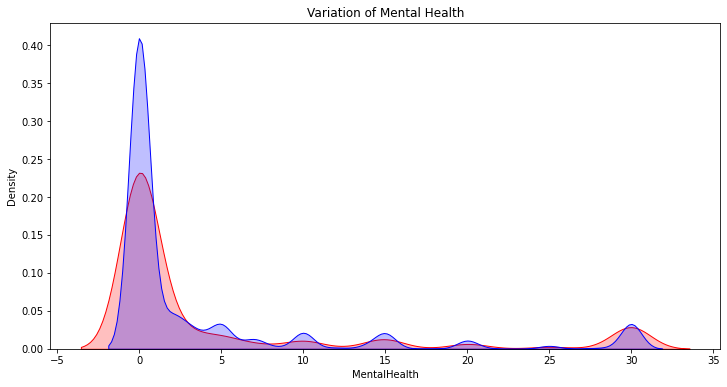

In [16]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# plotting both graphs on top of each other
sns.kdeplot(df[df['HeartDisease']=='Yes']['MentalHealth'],shade=True,color='red')
sns.kdeplot(df[df['HeartDisease']=='No']['MentalHealth'],shade=True,color='blue')
plt.title('Variation of Mental Health')

Text(0.5, 1.0, 'Distribution of BMI Among People')

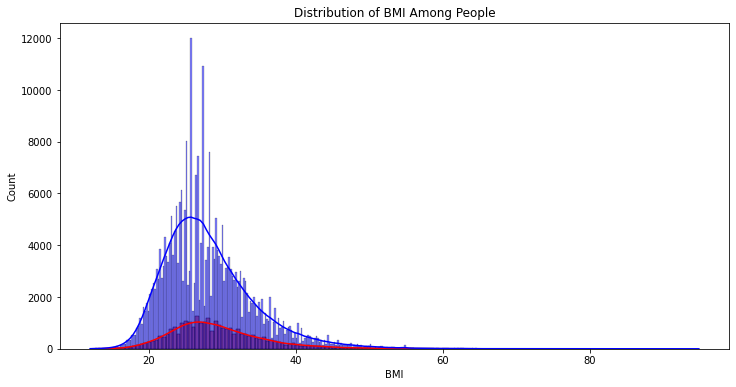

In [17]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# histplot plots the distribution of values in the particular column
# kde plots 'kernel distribution estimate' of that particular column
# plotting both graph on top of each other
sns.histplot(data=df[df['HeartDisease']=='Yes'],x='BMI',kde=True,color='red')
sns.histplot(data=df[df['HeartDisease']=='No'],x='BMI',kde=True,color='blue')
plt.title('Distribution of BMI Among People')

<AxesSubplot:>

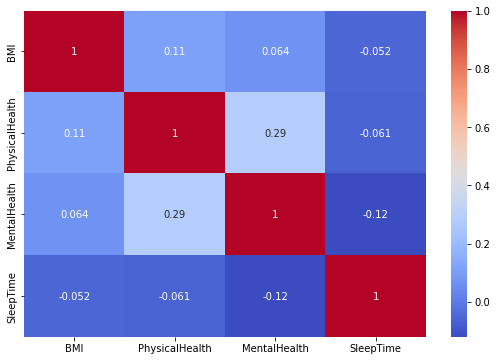

In [18]:
# importing matplotlib library
# import matplotlib
# This statement reduces the size of image
plt.figure(figsize=(9,6))
# plotting the graph
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [19]:
# the unique() function prints the unique values in a particular column. It is used to check the values in a categorical column.
# printing all the unique values of each column 
print(df['Smoking'].unique())
print(df['AlcoholDrinking'].unique())
print(df['Stroke'].unique())
print(df['DiffWalking'].unique())
print(df['Sex'].unique())
print(df['AgeCategory'].unique())
print(df['Race'].unique())
print(df['Diabetic'].unique())
print(df['PhysicalActivity'].unique())
print(df['GenHealth'].unique())
print(df['Asthma'].unique())
print(df['KidneyDisease'].unique())
print(df['SkinCancer'].unique())

['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Female' 'Male']
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
['Yes' 'No']
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']


In [20]:
# this is a user defined function that encodes the categorical columns
def change(col):
    if col=='Yes':
        return 1
    elif col=='No':
        return 0
# the apply() function puts value of each row one by one in a column to encode that whole column
# encoding all categorical columns having binary values
df['Smoking'] = df['Smoking'].apply(change)
df['AlcoholDrinking'] = df['AlcoholDrinking'].apply(change)
df['Stroke'] = df['Stroke'].apply(change)
df['DiffWalking'] = df['DiffWalking'].apply(change)
df['PhysicalActivity'] = df['PhysicalActivity'].apply(change)
df['Asthma'] = df['Asthma'].apply(change)
df['KidneyDisease'] = df['KidneyDisease'].apply(change)
df['SkinCancer'] = df['SkinCancer'].apply(change)
df['HeartDisease'] = df['HeartDisease'].apply(change)

In [21]:
df.head(5)
#checking the dataset after changing the values

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,Female,55-59,White,Yes,1,Very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,Female,80 or older,White,No,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,Male,65-69,White,Yes,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,Female,75-79,White,No,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,Female,40-44,White,No,1,Very good,8,0,0,0


In [22]:
# making an instance of the label encoder class
le = LabelEncoder()
# label encoding all the categorical columns that have more than 2 unique values
df['Sex']=le.fit_transform(df['Sex'])
df['AgeCategory']=le.fit_transform(df['AgeCategory'])
df['Race']=le.fit_transform(df['Race'])
df['Diabetic']=le.fit_transform(df['Diabetic'])
df['GenHealth']=le.fit_transform(df['GenHealth'])

In [23]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


In [24]:
# iloc[] function is used to select values from the dataset
# independent variables
X = df.iloc[:,1:].values
# dependent variable(heart disease)
y = df.iloc[:,0].values


In [25]:
# train_test_split() is used to divide dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
#feature scaling
# declaring an object of standardscaler class
sc = StandardScaler()
# fit_transform() method first trains the Scaler on dataset and then transforms it between 0 and 1
X_train = sc.fit_transform(X_train)
# transform() method only transforms the dataset based on what it has learnt on the dataset before
X_test = sc.transform(X_test)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model: Logistic Regression
Accuracy of the model: 0.9136430440175528
confusion matrix : AxesSubplot(0.125,0.125;0.62x0.755)
[[86890   662]
 [ 7623   764]]
-------------------------------------------------------


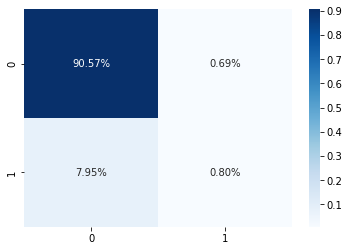

In [27]:
# declaring a object of Logistic regression class
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)
# predicting result using the trained data
y_prediction_1 = clf1.predict(X_test)
# confusion_matrix() gives the true_positives, false positives, true negatives, false negatives
# making confusion matrix using predicted and given results in validation data
confusion_matrix_m1=confusion_matrix(y_test,y_prediction_1)
print('Model: Logistic Regression')
print('Accuracy of the model:',accuracy_score(y_test,y_prediction_1))
print("confusion matrix :",sns.heatmap(confusion_matrix_m1/np.sum(confusion_matrix_m1), annot=True,fmt='.2%', cmap='Blues'))
print(confusion_matrix(y_test,y_prediction_1))
print('-------------------------------------------------------')


Model: K-Nearest Neighbor
Accuracy of the model: 0.9048040942682329
confusion matrix : AxesSubplot(0.125,0.125;0.62x0.755)
-------------------------------------------------------


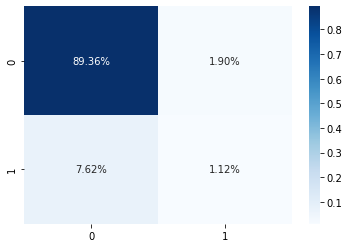

In [28]:
# declaring a object of K neighbor nearest class
clf2 = KNeighborsClassifier()
clf2.fit(X_train, y_train)
y_prediction_2 = clf2.predict(X_test)
confusion_matrix_m2=confusion_matrix(y_test,y_prediction_2)
print('Model: K-Nearest Neighbor')
print('Accuracy of the model:',accuracy_score(y_test,y_prediction_2))
print("confusion matrix :",sns.heatmap(confusion_matrix_m2/np.sum(confusion_matrix_m2), annot=True,fmt='.2%', cmap='Blues'))

print('-------------------------------------------------------')

Model: GaussianNB
Accuracy of the model: 0.8461835124401964
confusion matrix : AxesSubplot(0.125,0.125;0.62x0.755)
-------------------------------------------------------


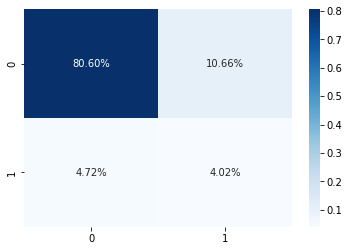

In [29]:
# declaring a object of GaussianNB  class
clf3 = GaussianNB()
clf3.fit(X_train, y_train)
y_prediction_3 = clf3.predict(X_test)
confusion_matrix_m3=confusion_matrix(y_test,y_prediction_3)
print('Model: GaussianNB')
print('Accuracy of the model:',accuracy_score(y_test,y_prediction_3))
print("confusion matrix :",sns.heatmap(confusion_matrix_m3/np.sum(confusion_matrix_m3), annot=True,fmt='.2%', cmap='Blues'))

print('-------------------------------------------------------')


Model: Decision Tree
Accuracy of the model: 0.8649558573677024
confusion matrix : AxesSubplot(0.125,0.125;0.62x0.755)
-------------------------------------------------------


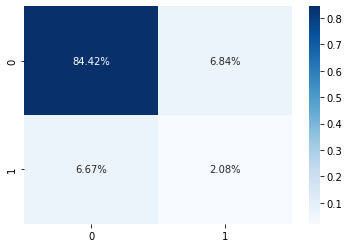

In [31]:
# declaring a object of Decision Tree Classifier class
clf4 = DecisionTreeClassifier(criterion='entropy')
clf4.fit(X_train, y_train)
y_prediction_4 = clf4.predict(X_test)
confusion_matrix_m4=confusion_matrix(y_test,y_prediction_4)
print('Model: Decision Tree')
print('Accuracy of the model:',accuracy_score(y_test,y_prediction_4))
print("confusion matrix :",sns.heatmap(confusion_matrix_m4/np.sum(confusion_matrix_m4), annot=True,fmt='.2%', cmap='Blues'))

print('-------------------------------------------------------')

Model: Random Forest Classifier
Accuracy of the model: 0.9040119242435297
confusion matrix : AxesSubplot(0.125,0.125;0.62x0.755)
-------------------------------------------------------


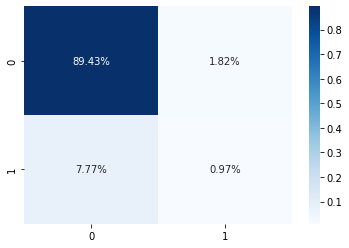

In [32]:
# declaring a object of  Random Forest Classifier class
clf5 = RandomForestClassifier(criterion='entropy',n_estimators=50)
clf5.fit(X_train, y_train)
y_prediction_5 = clf5.predict(X_test)
confusion_matrix_m5=confusion_matrix(y_test,y_prediction_5)
print('Model: Random Forest Classifier')
print('Accuracy of the model:',accuracy_score(y_test,y_prediction_5))
print("confusion matrix :",sns.heatmap(confusion_matrix_m5/np.sum(confusion_matrix_m5), annot=True,fmt='.2%', cmap='Blues'))

print('-------------------------------------------------------')


[23:39:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model: XGBoost
Accuracy of the model: 0.9137264303359426
confusion matrix : AxesSubplot(0.125,0.125;0.62x0.755)
-------------------------------------------------------


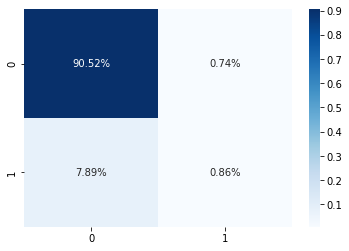

In [34]:
# declaring a object of XGBoost class
clf6 = XGBClassifier()
clf6.fit(X_train, y_train)
y_prediction_6 = clf6.predict(X_test)
confusion_matrix_m6=confusion_matrix(y_test,y_prediction_6)
print('Model: XGBoost')
print('Accuracy of the model:',accuracy_score(y_test,y_prediction_6))
print("confusion matrix :",sns.heatmap(confusion_matrix_m6/np.sum(confusion_matrix_m6), annot=True,fmt='.2%', cmap='Blues'))

print('-------------------------------------------------------')